Its just how data Accessed 

In [23]:
import pandas as pd
df = pd.read_excel("SupplyChainEmissionFactorsforUSIndustriesCommodities (1).xlsx", 
                   sheet_name="2015_Summary_Industry")
df = df.dropna(subset=["Supply Chain Emission Factors with Margins"])
df = df.drop_duplicates() 
df.head()

,Industry Code,Industry Name,Substance,Unit,Supply Chain Emission Factors without Margins,Margins of Supply Chain Emission Factors,Supply Chain Emission Factors with Margins,Unnamed: 7,DQ ReliabilityScore of Factors without Margins,DQ TemporalCorrelation of Factors without Margins,DQ GeographicalCorrelation of Factors without Margins,DQ TechnologicalCorrelation of Factors without Margins,DQ DataCollection of Factors without Margins
0,111CA,Farms,carbon dioxide,"kg/2018 USD, purchaser price",Supply Chain Emission Factors without Margins,0.041,0.465,NaN,4.0,2.0,1.0,4.0,1.0
1,111CA,Farms,methane,"kg/2018 USD, purchaser price",0.023,0.000,0.023,NaN,3.0,2.0,1.0,1.0,1.0
2,111CA,Farms,nitrous oxide,"kg/2018 USD, purchaser price",0.002,0.000,0.002,NaN,4.0,2.0,1.0,4.0,1.0
4,111CA,Farms,other GHGs,"kg CO2e/2018 USD, purchaser price",0.004,0.000,0.004,NaN,3.0,2.0,1.0,4.0,1.0
5,113FF,"Forestry, fishing, and related activities",carbon dioxide,"kg/2018 USD, purchaser price",0.184,0.017,0.201,NaN,4.0,2.0,1.0,4.0,1.0


Full Working Code

 Model Evaluation:
RMSE: 0.2649
R² Score: -2.2154


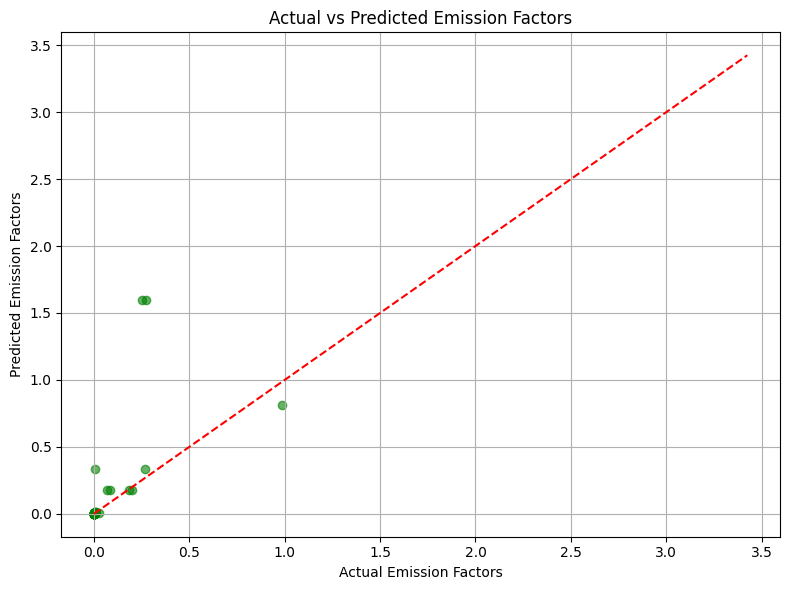

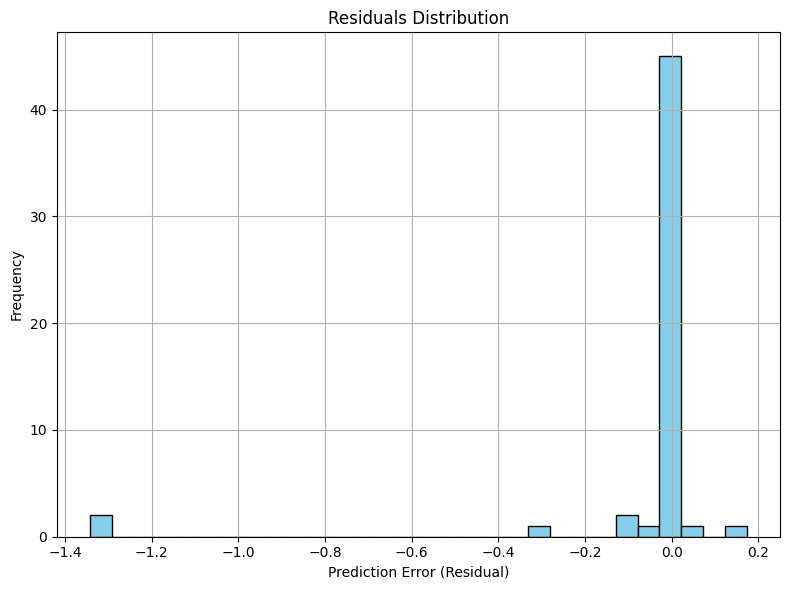

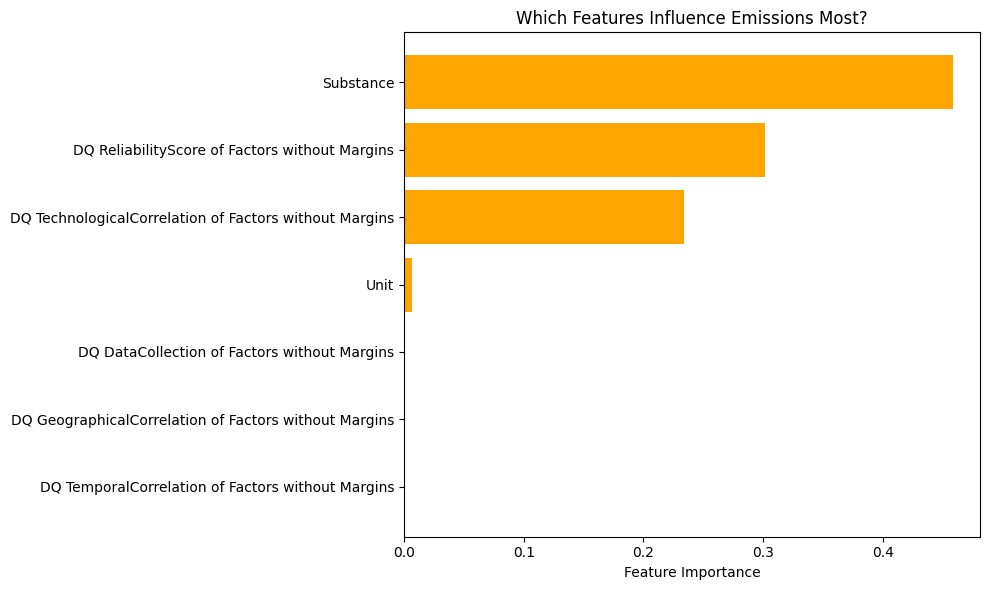

In [21]:
# STEP 1: Required libaries for this
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# STEP 2: Load the dataset
df = pd.read_excel("SupplyChainEmissionFactorsforUSIndustriesCommodities (1).xlsx", 
                   sheet_name="2015_Summary_Industry")

# STEP 3: Cleaning the data for using
df = df.dropna(subset=["Supply Chain Emission Factors with Margins"])  # drop missing target values
df = df.drop_duplicates()  #used to remove the duplicate values

# STEP 4: Preprocess steps are 
features = [
    "Substance", "Unit",
    "DQ ReliabilityScore of Factors without Margins",
    "DQ TemporalCorrelation of Factors without Margins",
    "DQ GeographicalCorrelation of Factors without Margins",
    "DQ TechnologicalCorrelation of Factors without Margins",
    "DQ DataCollection of Factors without Margins"
]
target = "Supply Chain Emission Factors with Margins"

# Filling missing values in input features
for col in features:
    if df[col].dtype != 'object':
        df[col] = df[col].fillna(df[col].median())
#Converting the Categorical Values to Numerical Values
le = LabelEncoder()
df["Substance"] = le.fit_transform(df["Substance"])
df["Unit"] = le.fit_transform(df["Unit"])

# STEP 5: Split data into 80% of training and 20% for testing
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# STEP 6: Train the model by rabdom forest regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# STEP 7: Model is predicted by the training and testing data
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(" Model Evaluation:")
print(f"RMSE: {rmse:.4f}")
print(f"R² Score: {r2:.4f}")

# STEP 8: Plot Actual vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='green')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Actual Emission Factors")
plt.ylabel("Predicted Emission Factors")
plt.title("Actual vs Predicted Emission Factors")
plt.grid(True)
plt.tight_layout()
plt.show()

# STEP 9: Ploting the values
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=30, color='skyblue', edgecolor='black')
plt.title("Residuals Distribution")
plt.xlabel("Prediction Error (Residual)")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.barh(sorted_features, importances[sorted_indices], color='orange')
plt.xlabel("Feature Importance")
plt.title("Which Features Influence Emissions Most?")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()